# Currency Exchange Rate Prediction

### 61_Pratyush Basavraj Jalkote

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression
from sklearn.metrics import roc_auc_score, mean_squared_error
sns.set()
plt.style.use('seaborn-whitegrid')
file_path = r"C:\Users\praty\OneDrive\Desktop\INR=X.csv"
data = pd.read_csv(file_path)
print(data.head())
print(data.tail())
data = data.dropna()

         Date       Open       High        Low      Close  Adj Close  Volume
0  2022-05-10  77.365501  77.460999  77.112503  77.365501  77.365501       0
1  2022-05-11  77.271400  77.518501  77.154503  77.271400  77.271400       0
2  2022-05-12  77.418404  77.725998  77.278999  77.418404  77.418404       0
3  2022-05-13  77.443802  77.558502  77.256798  77.443802  77.443802       0
4  2022-05-16  77.486298  77.913498  77.480003  77.486298  77.486298       0
           Date       Open       High        Low      Close  Adj Close  Volume
257  2023-05-04  81.779999  81.883797  81.616997  81.779999  81.779999       0
258  2023-05-05  81.716103  81.817200  81.645500  81.716103  81.716103       0
259  2023-05-08  81.729797  81.825302  81.673401  81.729797  81.729797       0
260  2023-05-09  81.787102  82.148499  81.775002  81.787102  81.787102       0
261  2023-05-10  82.105003  82.212799  81.865997  82.105003  82.105003       0


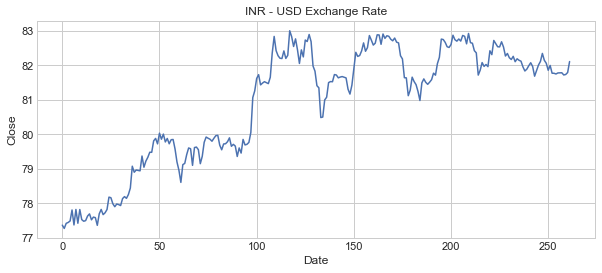

In [2]:
plt.figure(figsize=(10, 4))
plt.title("INR - USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

               Open      High       Low     Close  Adj Close  Volume
Open       1.000000  0.994854  0.995320  1.000000   1.000000     NaN
High       0.994854  1.000000  0.992184  0.994854   0.994854     NaN
Low        0.995320  0.992184  1.000000  0.995320   0.995320     NaN
Close      1.000000  0.994854  0.995320  1.000000   1.000000     NaN
Adj Close  1.000000  0.994854  0.995320  1.000000   1.000000     NaN
Volume          NaN       NaN       NaN       NaN        NaN     NaN


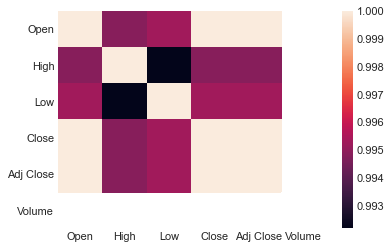

In [3]:
print(data.corr())
sns.heatmap(data.corr())
plt.show()

In [4]:
x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [5]:

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [7]:
data = pd.DataFrame(data={"Predicted Rate": ypred.flatten()})
print(data.head())

   Predicted Rate
0       82.140900
1       81.884804
2       82.239197
3       82.835297
4       79.552902


In [8]:
ypred = model.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("Mean squared error:", mse)

Mean squared error: 0.0019818911210567154


In [9]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, max_depth=5)
model.fit(xtrain, ytrain.ravel())
ypred = model.predict(xtest)

In [10]:
data = pd.DataFrame(data={"Predicted Rate": ypred.flatten()})
print(data.head())

   Predicted Rate
0       82.143607
1       81.826485
2       82.231401
3       82.854180
4       79.612691


In [11]:
mse = mean_squared_error(ytest, ypred)
print("Mean squared error:", mse)

Mean squared error: 0.0013125080035818848


|                       | RandomForestRegressor | DecisionTreeRegressor |
|-----------------------|------------------------|----------|
|                MSE    |0.0019818911210567154                        | 0.0013125080035818848          |
|                       |                        |          |